In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


# Data loading and preparation

In [2]:
data= '/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv'

df= pd.read_csv(data)

Age: Age of patient

Sex: Sex of the patient

BP: Blood Pressure

Cholesterol: Cholesterol level

Na_to_K: Sodium - Potassium

Drug:Drug that worked with that patient

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#Revisamos si hay valores nulos
df.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
#Verificamos la cantidad de datos
df.shape

(200, 6)

In [6]:
#Cambiamos las variables categoricas a valores numericos
import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=['Sex','BP','Cholesterol'])


In [7]:
new_df= encoder.fit_transform(df)
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,drugY
1,47,2,2,1,13.093,drugC
2,47,2,2,1,10.114,drugC
3,28,1,3,1,7.798,drugX
4,61,1,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,2,2,1,12.006,drugC
197,52,2,3,1,9.894,drugX
198,23,2,3,2,14.020,drugX


In [8]:
#Separamos las que vamos a usar para predecir el tipo de droga

predictors= ['Age','Sex','BP','Cholesterol','Na_to_K']

x=new_df[predictors]
y= new_df['Drug']

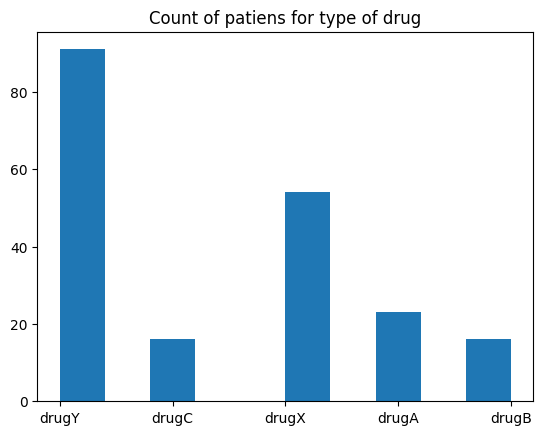

In [9]:
import matplotlib.pyplot as plt


plt.hist(y)
plt.title("Count of patiens for type of drug")
plt.show()

# Modelado

In [11]:
# Importamos las librerias necesarias
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score

In [12]:
# Dividimos los datos en entrenamiento y test
X_train, X_test,y_train,y_test= train_test_split(x,y, random_state=5)

In [15]:
# Importamos el arbol de desicion
tree= DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=None)

In [16]:
#Entrenamos el arbol con los valores de entrenamiento
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
#Predecimos los valores de x
y_test_prediction= tree.predict(X_test)

[Text(0.625, 0.875, 'x[4] <= 14.829\ngini = 0.706\nsamples = 150\nvalue = [20, 12, 11, 43, 64]'),
 Text(0.5, 0.625, 'x[2] <= 1.5\ngini = 0.66\nsamples = 86\nvalue = [20, 12, 11, 43, 0]'),
 Text(0.25, 0.375, 'x[0] <= 50.5\ngini = 0.469\nsamples = 32\nvalue = [20, 12, 0, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[3] <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.125, 'gini = 0.488\nsamples = 26\nvalue = [0, 0, 11, 15, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 64\nvalue = [0, 0, 0, 0, 64]')]

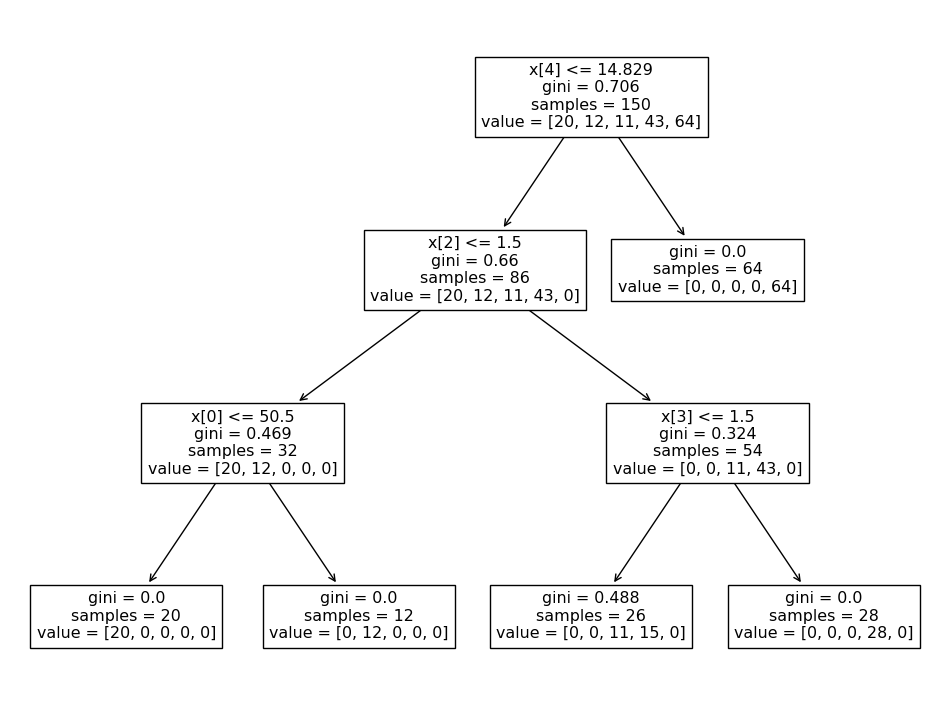

In [23]:
plt.figure(figsize=(12,9))
plot_tree(tree)

In [53]:
y.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

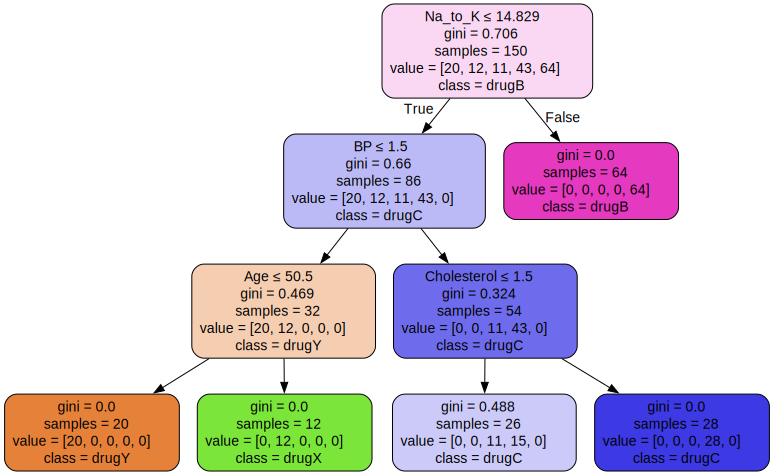

In [54]:
from sklearn.tree import export_graphviz

dot_data= export_graphviz(tree,out_file=None,
                          feature_names= X_train.columns,
                          class_names= ['drugY','drugX','drugA','drugC','drugB'],
                           filled= True,rounded=True,special_characters=True )

graph= graphviz.Source(dot_data)

graph

In [55]:
#Confirmamos la eficiencia de nuestro arbol
accuracy_score(y_test_prediction,y_test)

0.9

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test_prediction,y_test))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         3
       drugB       1.00      1.00      1.00         4
       drugC       0.00      0.00      0.00         0
       drugX       1.00      0.69      0.81        16
       drugY       1.00      1.00      1.00        27

    accuracy                           0.90        50
   macro avg       0.80      0.74      0.76        50
weighted avg       1.00      0.90      0.94        50



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resumen

En este proyecto construí un arbol de desición que se usará para determinar que tipo de droga se le debería de administrar un paciente según las caracteristicas que este tenga, analice la data que tenía y construí un arbol que tiene una presición de 0.9%. Para el arbol de desición obte por el usar el criterio gini, gini hace que el arbol se rija en que si seleccionamos 2 valores de una misma población, estos deben pertenecer a la misma categoria (en este caso la droga), esto hace que el arbol trabaje en base a si esta condición es existosa o no. 